In [1]:
import argopy
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean

# Subset Hurricane Track Data

In [7]:
hurricane_tracks.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=174)

In [5]:
hurricane_tracks = pd.read_csv("/home/jovyan/shared-public/OHW25/ArBu_proj_shared/ibtracs/ibtracs.ALL.list.v04r01.csv")

/tmp/ipykernel_284/278968951.py:1: DtypeWarning: Columns (1,2,8,9,14,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  hurricane_tracks = pd.read_csv("/home/jovyan/shared-public/OHW25/ArBu_proj_shared/ibtracs/ibtracs.ALL.list.v04r01.csv")


In [19]:
# time = hurricane_tracks['ISO_TIME']
# time
# # construct Boolean mask
mask = hurricane_tracks['ISO_TIME'].between('2015-01-01 00:00:00', '2025-08-18 18:00:00')
# apply Boolean mask
new_df = hurricane_tracks[mask]
new_df.to_csv("/home/jovyan/shared-public/OHW25/ArBu_proj_shared/ibtracs/ibtracs_2015-2025.csv",index=False)


# Gather Argo float data

In [4]:
#set modes for data fetcher
f = argopy.DataFetcher(mode='expert',ds='bgc')
#download float data from a specific WMO
WMO = 4903625
ds = f.float(WMO).to_xarray()
#save
ds.to_netcdf(path = "/home/jovyan/shared-public/OHW25/ArBu_proj_shared/float/WMO4903625_data.nc")

/srv/conda/envs/notebook/lib/python3.12/site-packages/argopy/xarray.py:70: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self._dims = list(xarray_obj.dims.keys())


In [3]:
ds

<xarray.Dataset> Size: 6MB
Dimensions:                          (N_POINTS: 16719)
Coordinates:
    LATITUDE                         (N_POINTS) float64 134kB ...
    LONGITUDE                        (N_POINTS) float64 134kB ...
    TIME                             (N_POINTS) datetime64[ns] 134kB ...
  * N_POINTS                         (N_POINTS) int64 134kB 0 1 ... 16717 16718
Data variables: (12/54)
    BBP700                           (N_POINTS) float32 67kB ...
    BBP700_ADJUSTED                  (N_POINTS) float32 67kB ...
    BBP700_ADJUSTED_ERROR            (N_POINTS) float32 67kB ...
    BBP700_ADJUSTED_QC               (N_POINTS) int64 134kB 0 0 1 0 ... 1 1 1 1
    BBP700_DATA_MODE                 (N_POINTS) <U1 67kB 'D' 'D' 'D' ... 'D' 'D'
    BBP700_QC                        (N_POINTS) int64 134kB 0 0 3 0 ... 3 3 3 3
    ...                               ...
    TEMP_ADJUSTED                    (N_POINTS) float32 67kB ...
    TEMP_ADJUSTED_ERROR              (N_POINTS) float32 67kB ...
    TEMP_ADJUSTED_QC                 (N_POINTS) int64 134kB 1 1 8 1 ... 1 1 1 1
    TEMP_DATA_MODE                   (N_POINTS) <U1 67kB 'D' 'D' 'D' ... 'D' 'D'
    TEMP_QC                          (N_POINTS) int64 134kB 1 1 8 1 ... 1 1 1 1
    TIME_QC                          (N_POINTS) int64 134kB 1 1 1 1 ... 1 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2025/08/20
    Fetched_constraints:  WMO4903625
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...

(<Figure size 900x540 with 1 Axes>,
 <Axes: xlabel='longitude', ylabel='latitude'>)

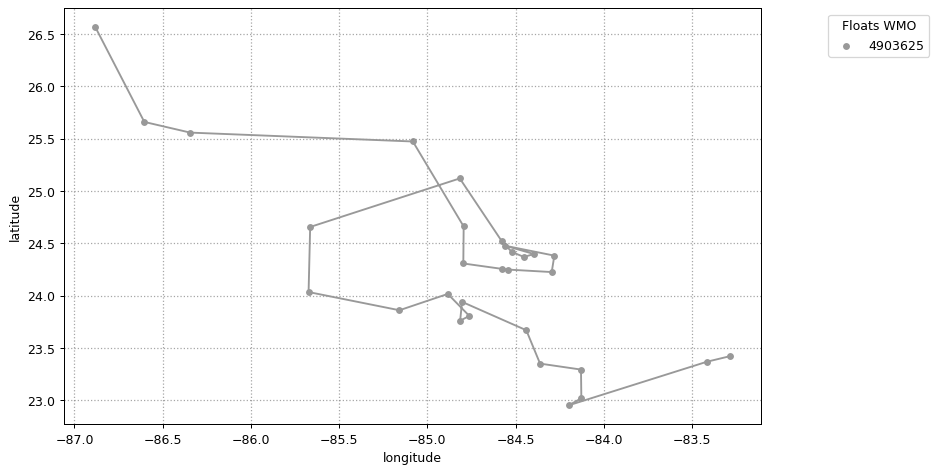

In [12]:
#create basic plot of trajectory
f.plot('trajectory')